In [1]:
# Installed all the useful libaries like:-
# I have tried to demonstrate and predict weather based on a dataset.
# The Machine learning Models used are:
# 1.K-Nearest Neighbour(KNN)
# 2. Support Vector Machine(SVM)
# 3. Gradient Boost
# 4. Extreme Gradient Boosting(XGBC)


In [2]:
# The python libaries that have used in the below project is:-
# 1.Numpy
# 2.Pandas
# 3.Matplotlib
# 4.Sklearn
# 5.Scipy



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as msno
from scipy import stats
from scipy.stats import ttest_ind, pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# Let us print the Data Frame ,And go across the data

In [5]:
data=pd.read_csv('seattle-weather.csv')
df=pd.DataFrame(data)
df

date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

In [6]:
# Now let us do the EDA(Exploratory data analysis)

In [7]:
df.head(5)

date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain

In [8]:
df.tail(5)

date  precipitation  temp_max  temp_min  wind weather
1456  2015-12-27            8.6       4.4       1.7   2.9    rain
1457  2015-12-28            1.5       5.0       1.7   1.3    rain
1458  2015-12-29            0.0       7.2       0.6   2.6     fog
1459  2015-12-30            0.0       5.6      -1.0   3.4     sun
1460  2015-12-31            0.0       5.6      -2.1   3.5     sun

In [9]:
print("The shape of the data is :-",df.shape)

The shape of the data is :- (1461, 6)


In [10]:
# Let us check the null values or the duplicates in the data ,
# And act accordingly to clean the data across the data set

In [11]:
print("The number of null values in the column of the data set:-",df.isna().sum())

The number of null values in the column of the data set:- date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [12]:
# Seems Like there is no any types of null values present in the data set.
# that is a good data ,so let us work on the data to predict the weather on the certain days


In [13]:


# Summary statistics
print(data.describe())



       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


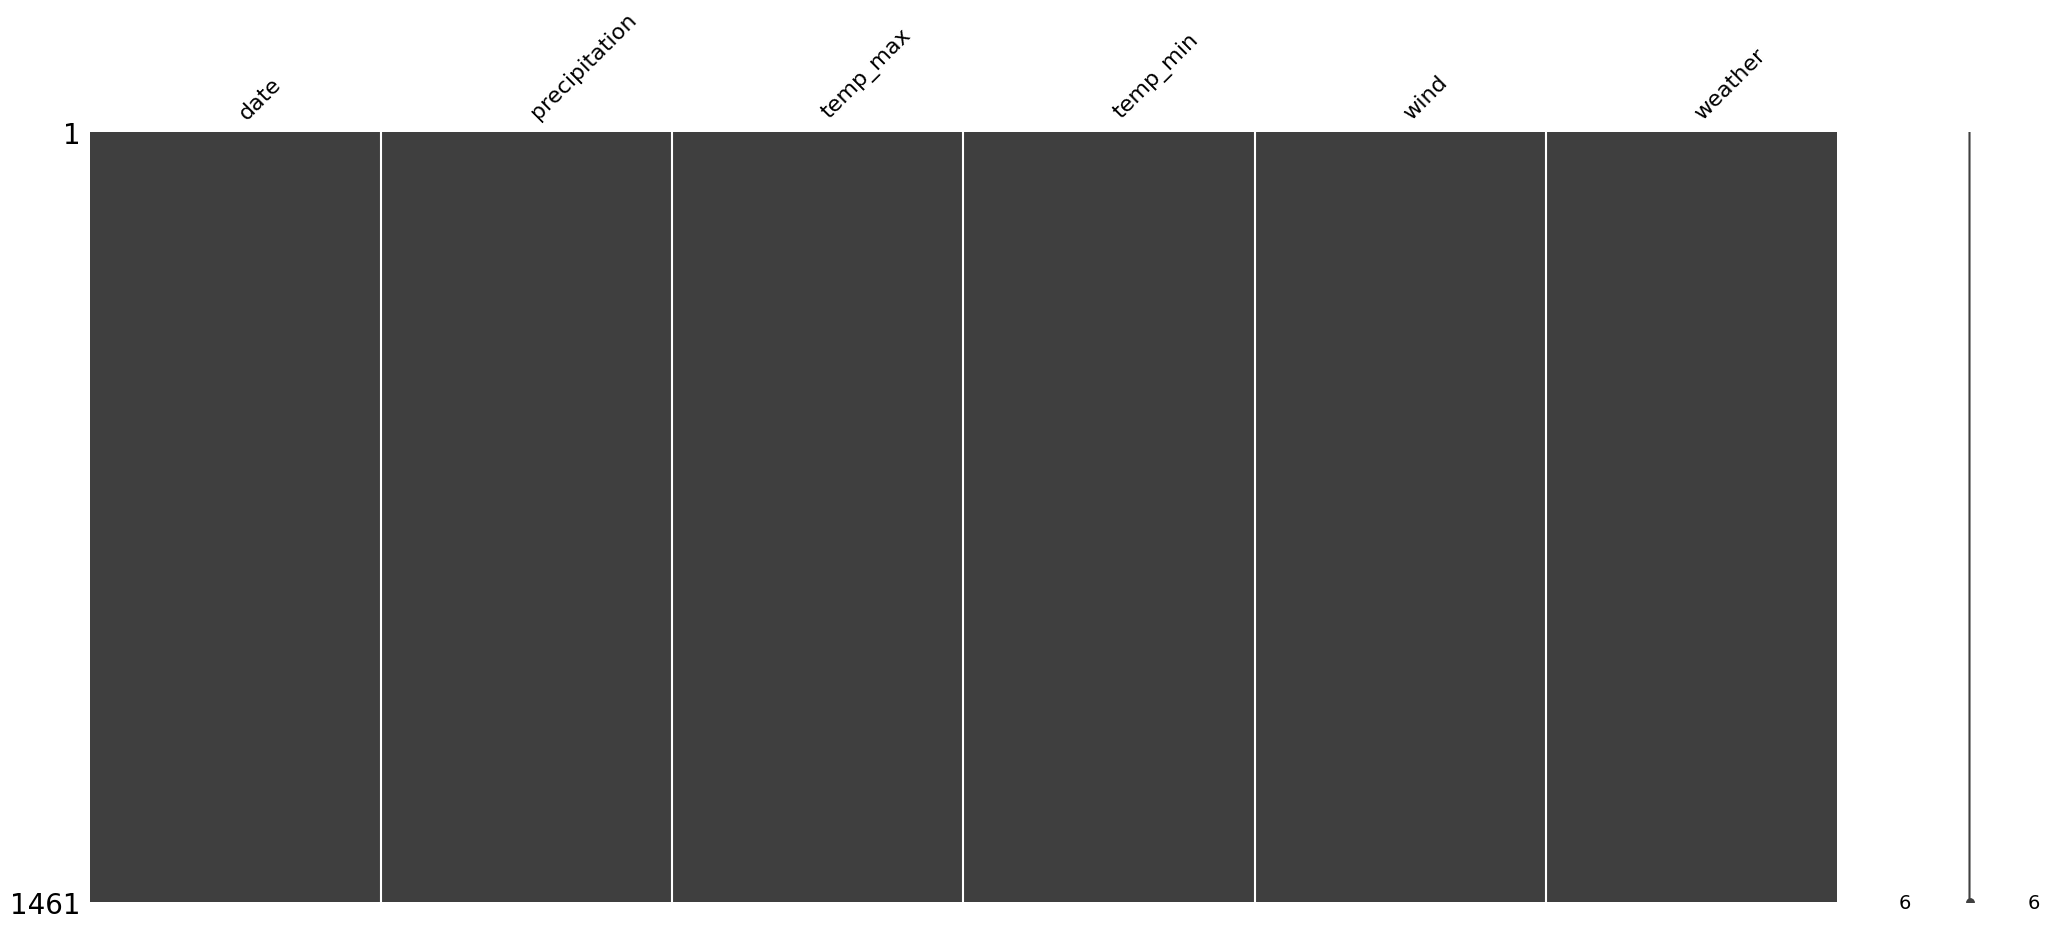

In [14]:
# Visualize missing values
import missingno as msno
msno.matrix(data)
plt.show()
# NO missing values,Null values are present in the data

In [15]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000
date             0
precipitation    0
temp_max         0
temp_min         0


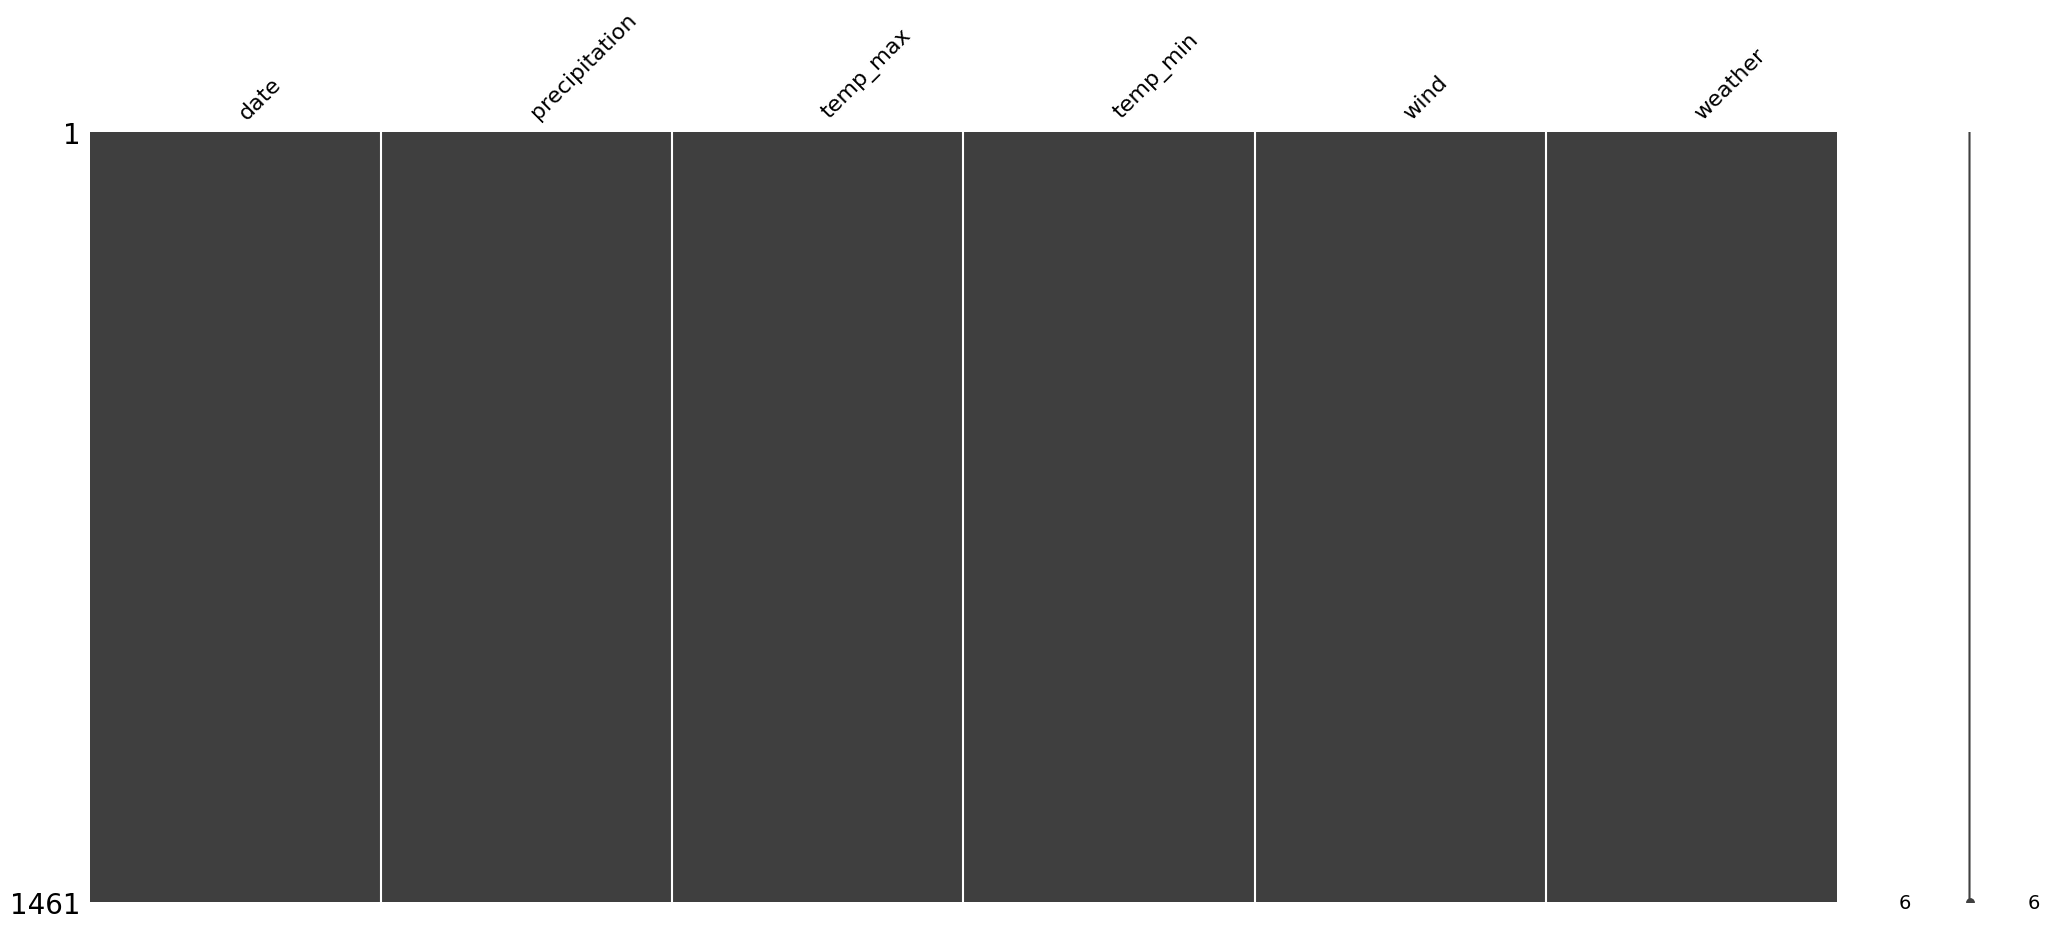

KNN Accuracy: 0.7235494880546075
Confusion Matrix:
 [[  3   0   3   0   3]
 [  0   8   4   0  13]
 [  2   1  95   0  22]
 [  0   0   7   0   1]
 [  2   2  21   0 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.73      0.32      0.44        25
           2       0.73      0.79      0.76       120
           3       0.00      0.00      0.00         8
           4       0.73      0.81      0.77       131

    accuracy                           0.72       293
   macro avg       0.52      0.45      0.47       293
weighted avg       0.70      0.72      0.70       293

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......

C:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as msno
from scipy import stats
from scipy.stats import ttest_ind, pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
data = pd.read_csv('seattle-weather.csv')  # Adjust the path to your data file

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize missing values
msno.matrix(data)
plt.show()

# Encode categorical variables
le = LabelEncoder()
data['weather'] = le.fit_transform(data['weather'])

# Feature engineering (if needed)
# Example: Extract month and year from date
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data.drop('date', axis=1, inplace=True)

# Define features and target
X = data.drop('weather', axis=1)
y = data['weather']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building and Evaluation

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


# Hyperparameter Tuning (Optional)

# Grid Search for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
y_pred_grid = grid.predict(X_test)
print("Grid Search SVM Accuracy:", accuracy_score(y_test, y_pred_grid))


In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.7235494880546075
Confusion Matrix:
 [[  3   0   3   0   3]
 [  0   8   4   0  13]
 [  2   1  95   0  22]
 [  0   0   7   0   1]
 [  2   2  21   0 106]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.73      0.32      0.44        25
           2       0.73      0.79      0.76       120
           3       0.00      0.00      0.00         8
           4       0.73      0.81      0.77       131

    accuracy                           0.72       293
   macro avg       0.52      0.45      0.47       293
weighted avg       0.70      0.72      0.70       293



C:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [18]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7508532423208191
Confusion Matrix:
 [[  0   0   1   0   8]
 [  0   0   2   0  23]
 [  0   0  99   0  21]
 [  0   0   8   0   0]
 [  0   0  10   0 121]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.82      0.82      0.82       120
           3       0.00      0.00      0.00         8
           4       0.70      0.92      0.80       131

    accuracy                           0.75       293
   macro avg       0.30      0.35      0.32       293
weighted avg       0.65      0.75      0.69       293



C:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [19]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print("GBC Accuracy:", accuracy_score(y_test, y_pred_gbc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))
print("Classification Report:\n", classification_report(y_test, y_pred_gbc))


GBC Accuracy: 0.825938566552901
Confusion Matrix:
 [[  1   0   0   0   8]
 [  0   9   0   0  16]
 [  0   0 111   2   7]
 [  0   0   6   2   0]
 [  6   5   1   0 119]]
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.11      0.12         9
           1       0.64      0.36      0.46        25
           2       0.94      0.93      0.93       120
           3       0.50      0.25      0.33         8
           4       0.79      0.91      0.85       131

    accuracy                           0.83       293
   macro avg       0.60      0.51      0.54       293
weighted avg       0.81      0.83      0.81       293



In [20]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8225255972696246
Confusion Matrix:
 [[  0   0   1   0   8]
 [  0  10   0   0  15]
 [  0   0 111   3   6]
 [  0   0   6   2   0]
 [  5   6   2   0 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.62      0.40      0.49        25
           2       0.93      0.93      0.93       120
           3       0.40      0.25      0.31         8
           4       0.80      0.90      0.85       131

    accuracy                           0.82       293
   macro avg       0.55      0.50      0.51       293
weighted avg       0.80      0.82      0.81       293



In [21]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
y_pred_grid = grid.predict(X_test)
print("Grid Search SVM Accuracy:", accuracy_score(y_test, y_pred_grid))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

KNN Accuracy: 0.7235494880546075
SVM Accuracy: 0.7508532423208191
GBC Accuracy: 0.825938566552901
XGBoost Accuracy: 0.8225255972696246


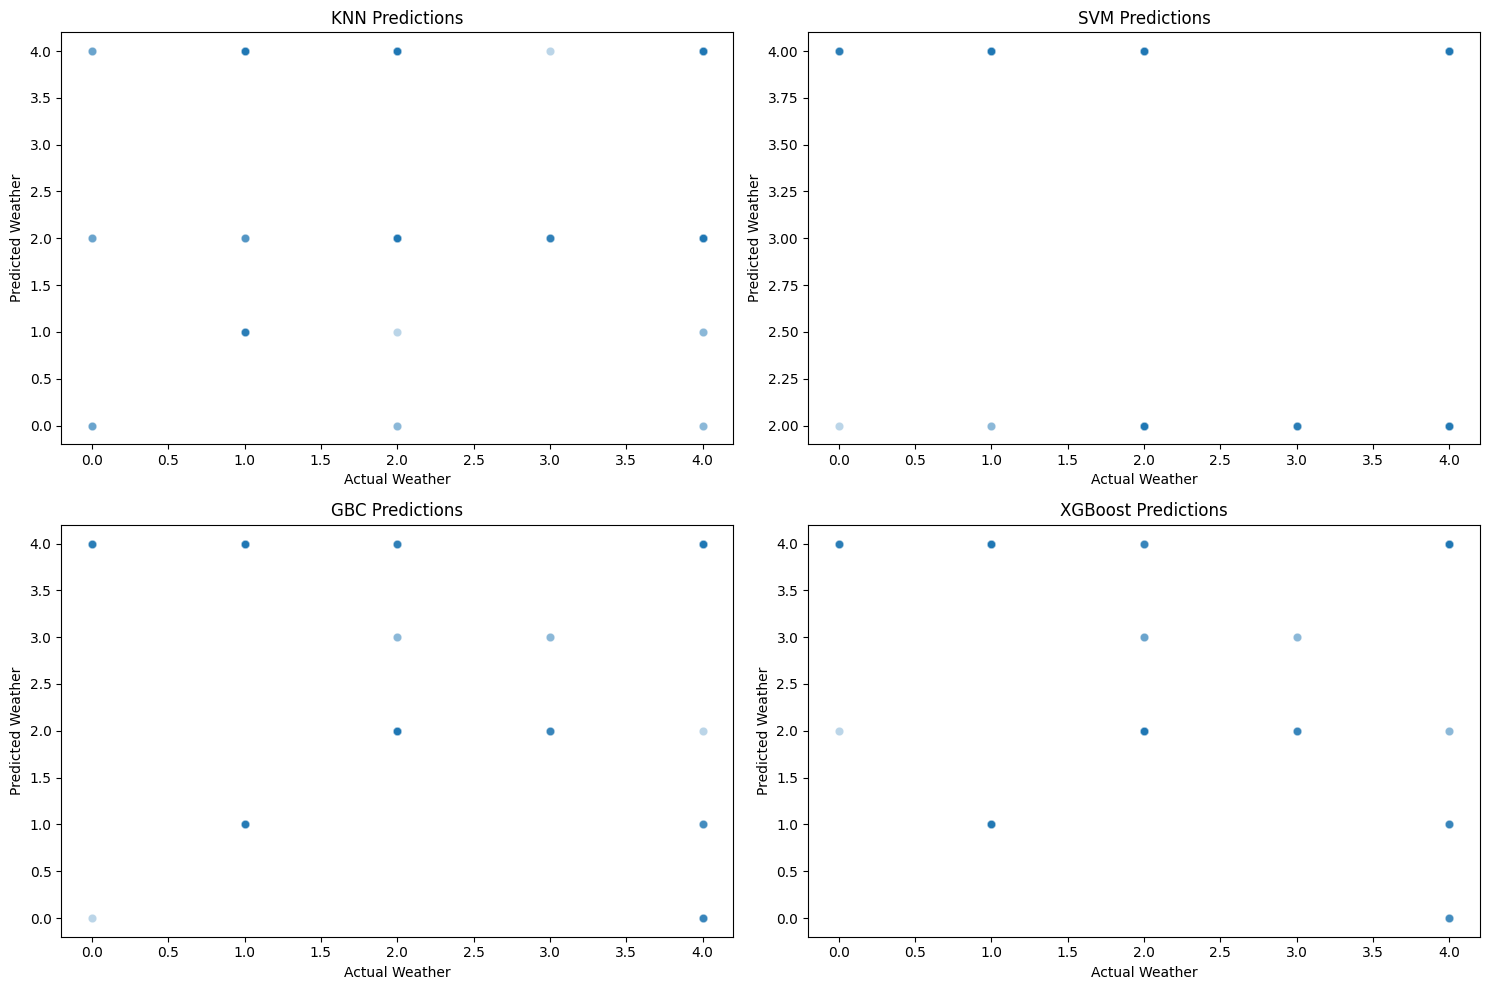

In [22]:


# Load the data
data = pd.read_csv('seattle-weather.csv')  # Adjust the path to your data file

# Ensure 'date' column exists
if 'date' in data.columns:
    # Feature engineering
    data['date'] = pd.to_datetime(data['date'])
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data.drop('date', axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['weather'] = le.fit_transform(data['weather'])

# Define features and target
X = data.drop('weather', axis=1)
y = data['weather']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the models and make predictions
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GBC": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)
    print(f"{name} Accuracy:", accuracy_score(y_test, predictions[name]))

# Plotting the predictions
plt.figure(figsize=(15, 10))

for i, (name, y_pred) in enumerate(predictions.items(), start=1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
    plt.xlabel('Actual Weather')
    plt.ylabel('Predicted Weather')
    plt.title(f'{name} Predictions')

plt.tight_layout()
plt.show()


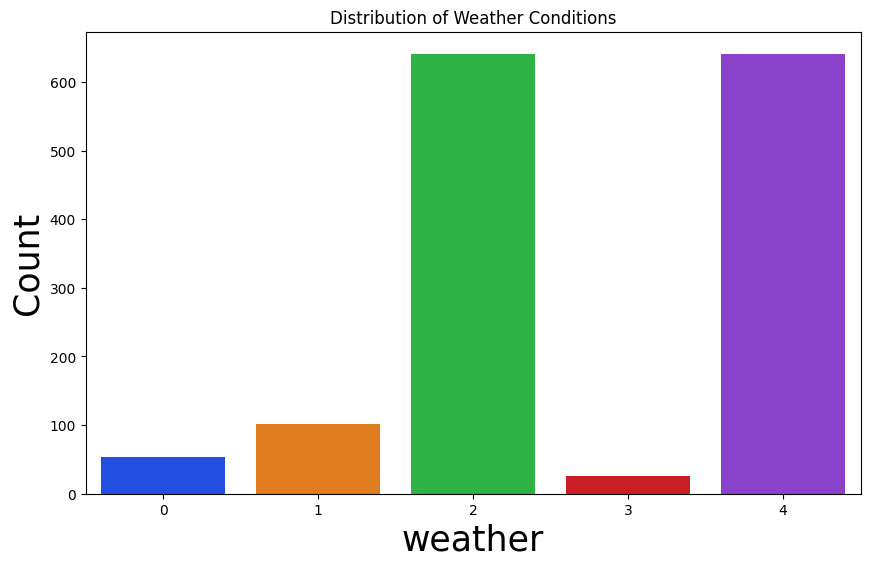

In [23]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(x="weather", data=data, palette='bright')
plt.title("Distrbution of weather")
plt.ylabel('Count',size=25)
plt.xlabel('weather',size=25)
plt.title('Distribution of Weather Conditions')
plt.show()


In [24]:

# Inspect the unique values in the weather column
print(data['weather'].unique())

countrain=len(df[df.weather=='rain'])
countsun=len(df[df.weather=='sun'])
countdrizzle=len(df[df.weather=='drizzle'])
countfog=len(df[df.weather=='fog'])
countsnow=len(df[df.weather=='snow'])


# Calculate the total number of entries

total_count = len(df.weather)


print("percent of rain:{:2f}%".format((countrain/(len(data.weather))*100)))
print("percent of sun:{:2f}%".format((countsun/(len(data.weather))*100)))
print("percent of drizzle:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("percent of snow:{:2f}%".format((countsnow/(len(data.weather))*100)))
print("percent of fog:{:2f}%".format((countfog/(len(data.weather))*100)))




[0 2 4 3 1]
percent of rain:43.874059%
percent of sun:43.805613%
percent of drizzle:3.627652%
percent of snow:1.779603%
percent of fog:6.913073%


In [25]:
df[['precipitation', 'temp_max', 'temp_min', 'wind']].describe()

precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000

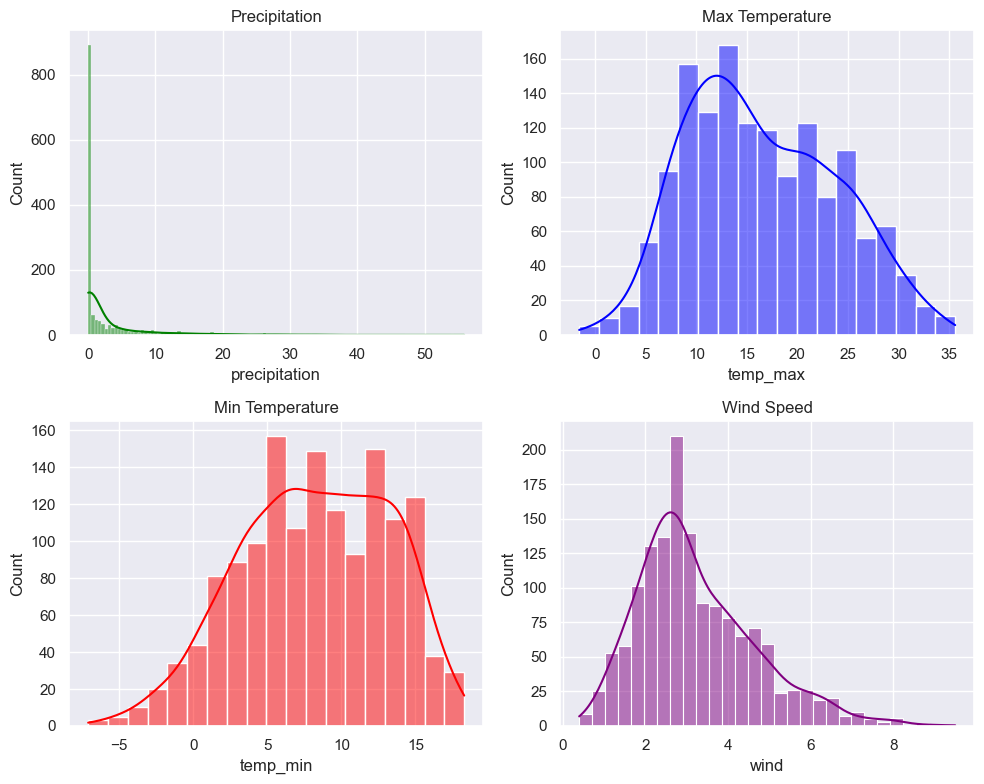

In [26]:

# Set the style for the plots
sns.set(style='darkgrid')

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot histograms with KDE for each specified column
sns.histplot(data=df, x='precipitation', kde=True, ax=axs[0, 0], color='green')
axs[0, 0].set_title('Precipitation')

sns.histplot(data=df, x='temp_max', kde=True, ax=axs[0, 1], color='blue')
axs[0, 1].set_title('Max Temperature')

sns.histplot(data=df, x='temp_min', kde=True, ax=axs[1, 0], color='red')
axs[1, 0].set_title('Min Temperature')

sns.histplot(data=df, x='wind', kde=True, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Wind Speed')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [27]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

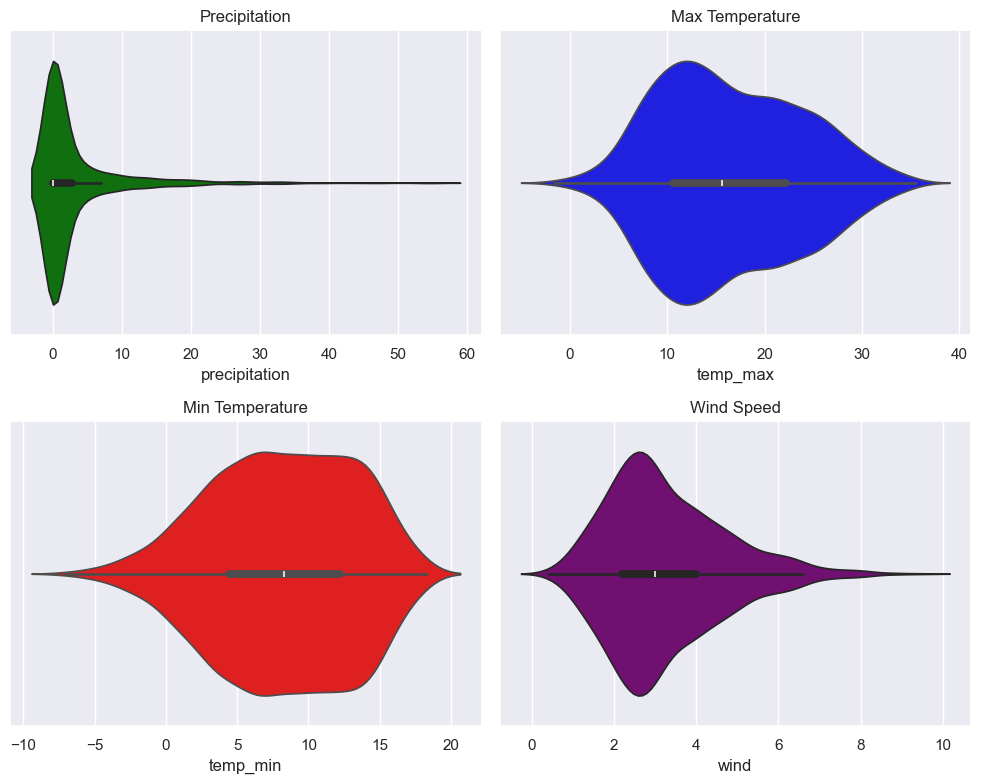

In [28]:
# Set the style for the plots
sns.set(style='darkgrid')

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


# Plot violinograms/violin plot with KDE for each specified column
sns.violinplot(data=df, x='precipitation', ax=axs[0, 0], color='green')
axs[0, 0].set_title('Precipitation')

sns.violinplot(data=df, x='temp_max', ax=axs[0, 1], color='blue')
axs[0, 1].set_title('Max Temperature')

sns.violinplot(data=df, x='temp_min', ax=axs[1, 0], color='red')
axs[1, 0].set_title('Min Temperature')

sns.violinplot(data=df, x='wind',  ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Wind Speed')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [29]:
# To make predictions based on the weather data provided, we can use machine learning models.
# Here's an example of how to preprocess the data, train a model, and make predictions.
# We'll use a classification model to predict the weather condition based on other features
# like precipitation, temp_max, temp_min, and wind.

# Here's the complete workflow:

# Preprocessing the Data
# Splitting the Data
# Training a Model
# Making Predictions
# Evaluating the Model
# I'll use the GradientBoostingClassifier as an example. 
# You can easily switch to other classifiers if needed.

In [30]:

data = pd.read_csv('seattle-weather.csv')

# Preprocessing
# Encoding the weather column
le = LabelEncoder()
data['weather'] = le.fit_transform(data['weather'])

# Feature engineering (if needed)
# Example: Extract month and year from date
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Defining features and target variable
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
X = data[features]
y = data['weather']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=le.classes_)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Example prediction on new data
new_data = np.array([[0.0, 12.8, 5.0, 4.7]])  # Replace with actual new data
new_data_scaled = scaler.transform(new_data)
new_pred = model.predict(new_data_scaled)
new_pred_label = le.inverse_transform(new_pred)
print("*******Predicted Weather Condition for New Data:*********==", new_pred_label[0])


Accuracy: 81.57%
Confusion Matrix:
 [[  1   0   0   0   8]
 [  1   1   0   0  23]
 [  0   0 110   3   7]
 [  0   0   6   2   0]
 [  0   4   2   0 125]]
Classification Report:
               precision    recall  f1-score   support

     drizzle       0.50      0.11      0.18         9
         fog       0.20      0.04      0.07        25
        rain       0.93      0.92      0.92       120
        snow       0.40      0.25      0.31         8
         sun       0.77      0.95      0.85       131

    accuracy                           0.82       293
   macro avg       0.56      0.45      0.47       293
weighted avg       0.77      0.82      0.78       293

*******Predicted Weather Condition for New Data:*********== sun


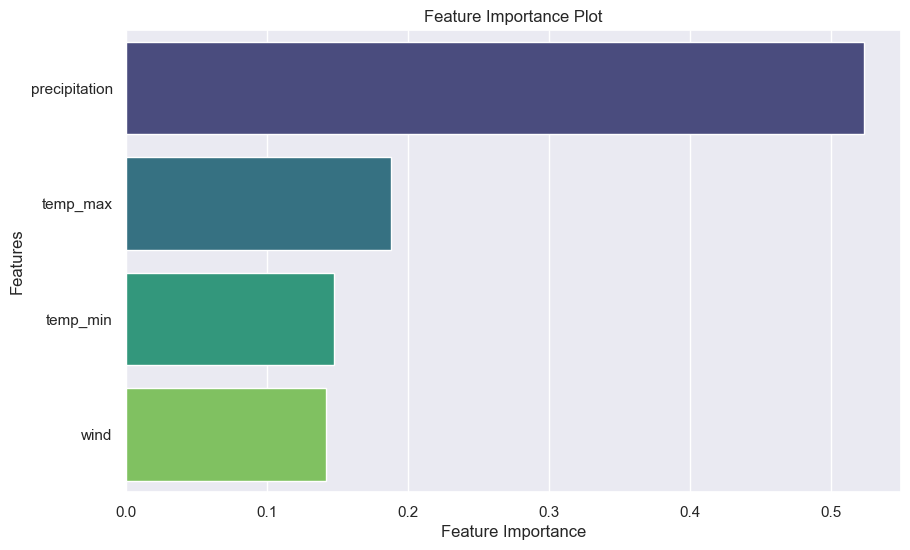

In [31]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
# Get feature importances from the model
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


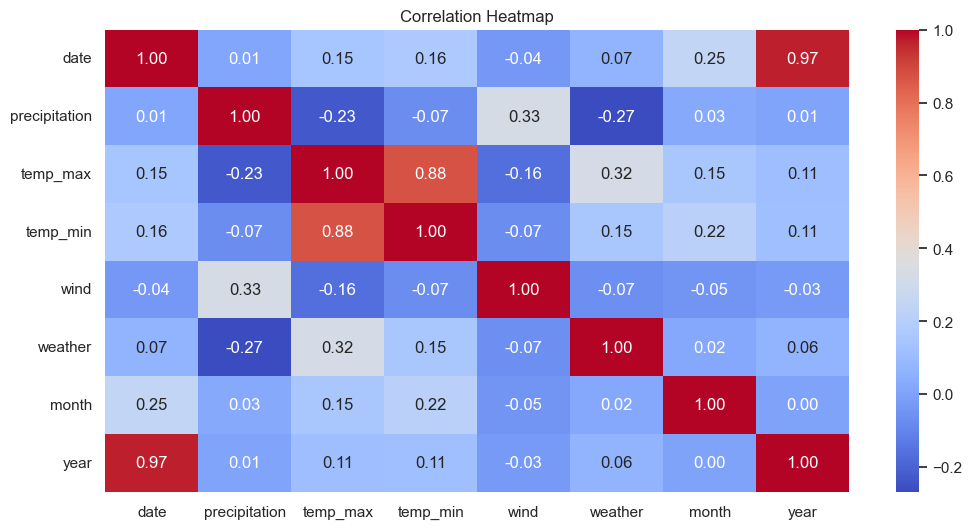

In [32]:

# Assuming 'data' is your DataFrame containing the relevant columns

plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


pearsons correlation:  -0.22855481643297032
T test and P value:  TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


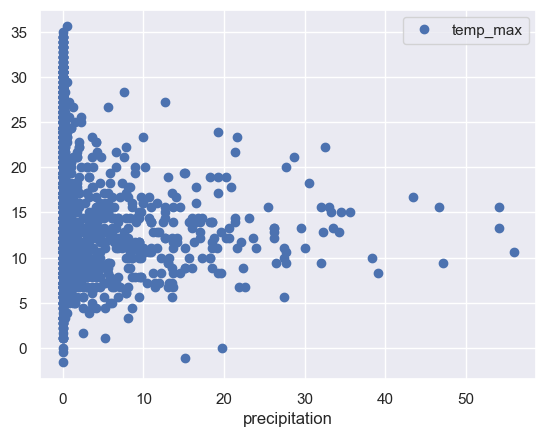

In [33]:

data.plot("precipitation",'temp_max',style='o')
print('pearsons correlation: ',data['precipitation'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['precipitation'],data['temp_max']))

pearsons correlation:  -0.16485663487495475
T test and P value:  TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


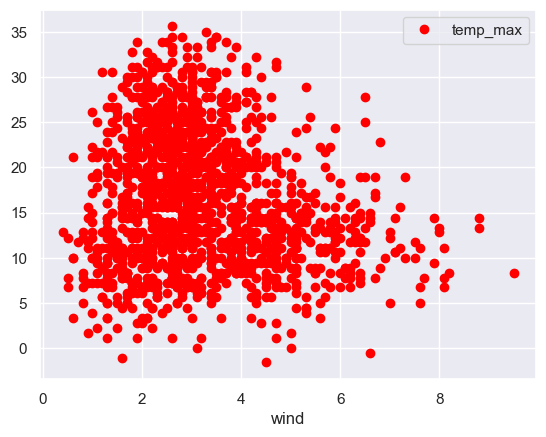

In [34]:
data.plot("wind",'temp_max',style='o',color='red')
print('pearsons correlation: ',data['wind'].corr(data['temp_max']))
print('T test and P value: ',stats.ttest_ind(data['wind'],data['temp_max']))


<Axes: xlabel='temp_max'>

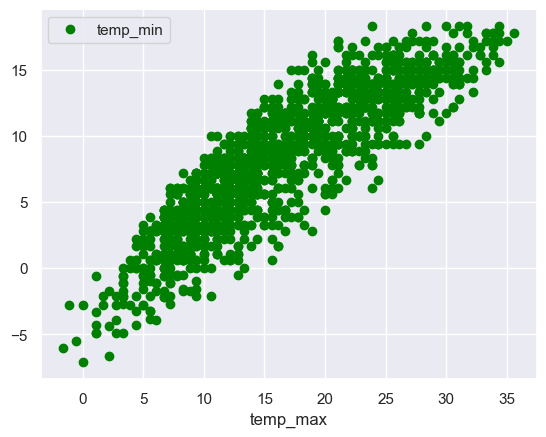

In [35]:
data.plot('temp_max','temp_min',style='o',color='green')

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'month', 'year'],
      dtype='object')


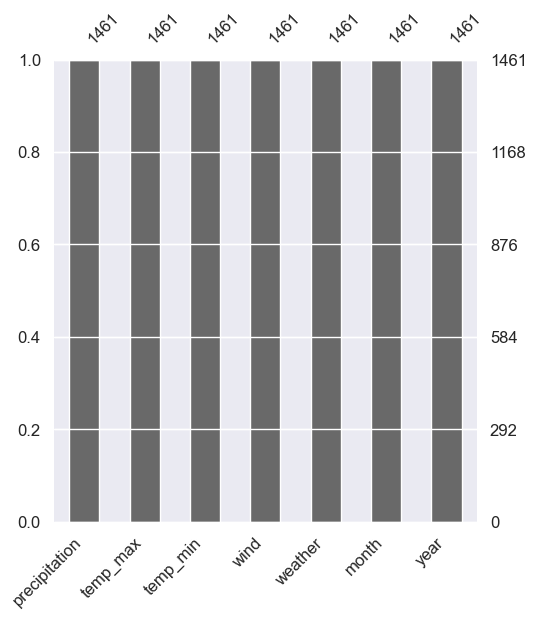

In [36]:
import matplotlib.pyplot as plt
import missingno as msno

# Check the column names in your DataFrame
print(data.columns)

# Ensure 'date' is a column in your DataFrame
if 'date' in data.columns:
    data_without_date = data.drop(['date'], axis=1)
else:
    data_without_date = data

# Plot the missing values bar chart
plt.figure(figsize=(12, 6))
axz = plt.subplot(1, 2, 2)
msno.bar(data_without_date, ax=axz, fontsize=12)
plt.show()


In [37]:


data=df.drop(['date'],axis=1)
data

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9     rain
1457            1.5       5.0       1.7   1.3     rain
1458            0.0       7.2       0.6   2.6      fog
1459            0.0       5.6      -1.0   3.4      sun
1460            0.0       5.6      -2.1   3.5      sun

[1461 rows x 5 columns]

In [38]:
# prediction

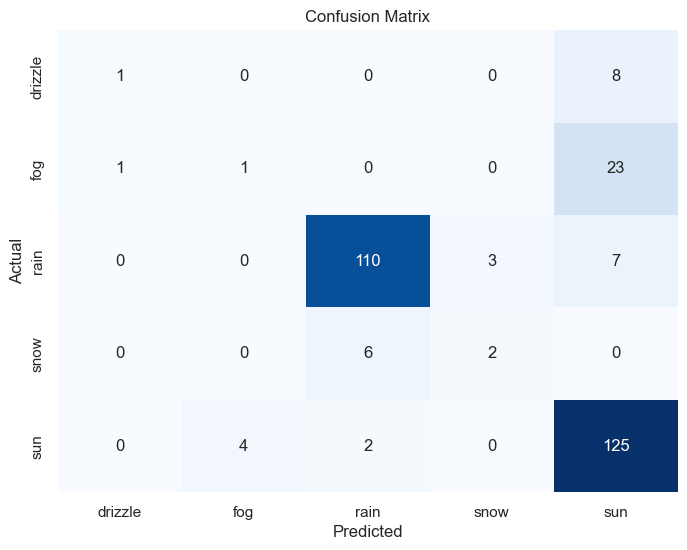

*******Predicted Weather Condition for New Data:*********== sun


In [39]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Example prediction on new data
new_data = np.array([[0.0, 12.8, 5.0, 4.7]])  # Replace with actual new data
new_data_scaled = scaler.transform(new_data)
new_pred = model.predict(new_data_scaled)
new_pred_label = le.inverse_transform(new_pred)
print("*******Predicted Weather Condition for New Data:*********==", new_pred_label[0])



In [40]:
# Prediction

In [54]:
import pickle

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)


from xgboost import XGBRegressor

model = XGBRegressor()




# Assuming you have training data loaded as X_train and y_train

# Option 1: Train the model
# (Replace XGBRegressor with XGBClassifier if it's classification)
model = XGBRegressor()
model.fit(X_train, y_train)

# Option 2: Load a pre-trained model
# with open('model.pkl', 'rb') as f:
#     model = pickle.load(f)

# Make predictions
input = [[2.140175, 0.0, 1.0, 0.411118]]
ot = model.predict(input)

print('the weather is:')
if ot[0] == 0:  # Assuming ot is a single value for regression
    print('Drizzle')
elif ot[0] == 1:
    print('Fog')  # Corrected spelling
elif ot[0] == 2:
    print('Rain')
elif ot[0] == 3:
    print('Snow')
else:
    print('Sun')


the weather is:
Sun


In [ ]:
df.columns